<a href="https://colab.research.google.com/github/naren-17/BOOTCAMP/blob/main/Day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [ ]:

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['MedHouseVal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[X_train.shape[1]])
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01), loss='mse')

history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test), verbose=1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 2.7816 - val_loss: 0.5388
Epoch 2/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.2449 - val_loss: 0.5481
Epoch 3/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0324 - val_loss: 0.5619
Epoch 4/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.3445 - val_loss: 0.5560
Epoch 5/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4858 - val_loss: 0.5595
Epoch 6/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5045 - val_loss: 0.5876
Epoch 7/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0289 - val_loss: 0.5700
Epoch 8/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5001 - val_loss: 0.5555
Epoch 9/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3021 - val_loss: 0.5728
Epoch 10/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0125 - val_loss: 0.5733
Epoch 11/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.1915 - val_loss: 0.5709
Epoch 12/20
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

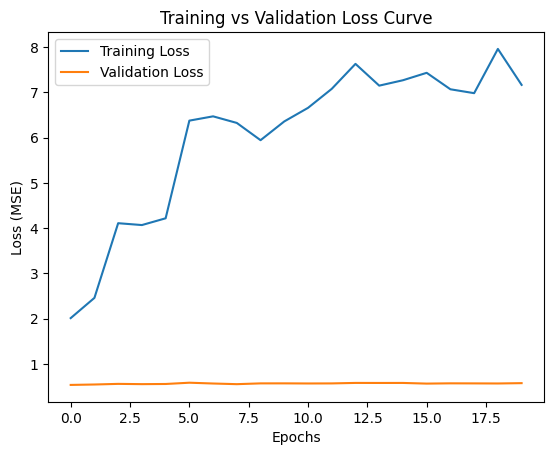

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss Curve")
plt.show()


# **Task 2**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_samples = 1000
image_size = 28 * 28
X = np.random.randint(0, 256, (num_samples, image_size)) / 255.0

y = np.random.randint(0, 10, num_samples)

y = to_categorical(y, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(10, input_shape=(784,), activation="softmax")
])

model.compile(optimizer=RMSprop(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

predictions = model.predict(X_test[:5])



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1042 - loss: 2.4956 - val_accuracy: 0.1050 - val_loss: 2.3829
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1120 - loss: 2.3581 - val_accuracy: 0.0900 - val_loss: 2.4193
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1637 - loss: 2.3043 - val_accuracy: 0.0700 - val_loss: 2.4263
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1975 - loss: 2.2683 - val_accuracy: 0.0550 - val_loss: 2.4338
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1803 - loss: 2.2090 - val_accuracy: 0.1000 - val_loss: 2.4186
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2104 - loss: 2.1775 - val_accuracy: 0.1100 - val_loss: 2.4032
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2687 - loss: 2.1039 - val_accuracy: 0.0600 - val_loss: 2.4408
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2526 - loss: 2.0976 - val_accuracy: 0.0800 - val_loss: 2.4237
Ep

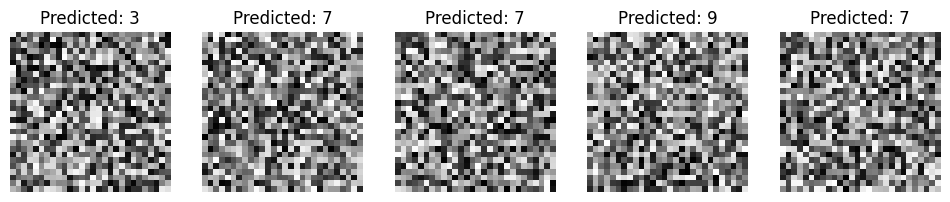

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Predicted: {np.argmax(predictions[i])}")
    ax.axis("off")

plt.show()


# **Task 3**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


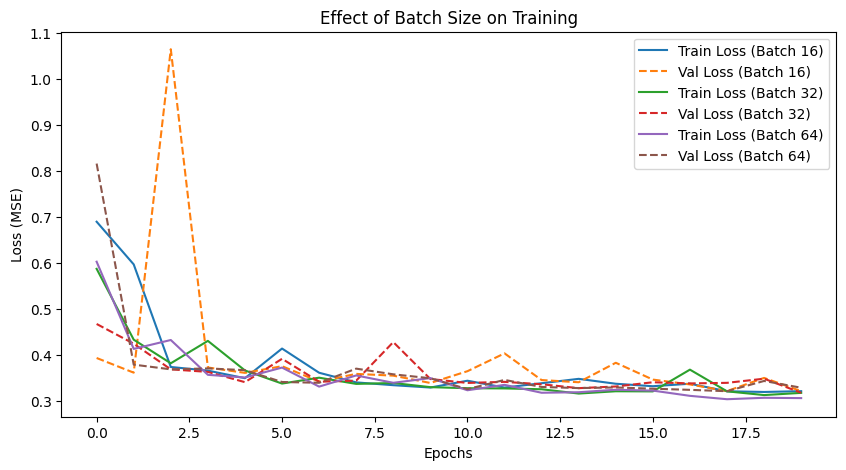

Batch Size 16: 1032 mini-batches per epoch
Batch Size 32: 516 mini-batches per epoch
Batch Size 64: 258 mini-batches per epoch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X, y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

batch_sizes = [16, 32, 64]
history_results = {}

for batch_size in batch_sizes:
    model = create_model()
    history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    history_results[batch_size] = history

plt.figure(figsize=(10, 5))
for batch_size, history in history_results.items():
    plt.plot(history.history['loss'], label=f'Train Loss (Batch {batch_size})')
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f'Val Loss (Batch {batch_size})')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Effect of Batch Size on Training')
plt.legend()
plt.show()
num_train_samples = X_train.shape[0]
for batch_size in batch_sizes:
    mini_batches = np.ceil(num_train_samples / batch_size)
    print(f"Batch Size {batch_size}: {int(mini_batches)} mini-batches per epoch")


### **Task 4**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2390 - loss: 2.2949 - val_accuracy: 0.2571 - val_loss: 2.2671
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3077 - loss: 2.0904 - val_accuracy: 0.3075 - val_loss: 2.0839
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3168 - loss: 2.0582 - val_accuracy: 0.3160 - val_loss: 2.0495
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3275 - loss: 2.0280 - val_accuracy: 0.3262 - val_loss: 2.1341
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3334 - loss: 2.0274 - val_accuracy: 0.2864 - val_loss: 2.4507
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3375 - loss: 2.0103 - val_accuracy: 0.3470 - val_loss: 1.9371
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3358 - loss: 2.0017 - val_accuracy: 0.2608 - val_loss: 2.3596
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3414 - loss: 1.99

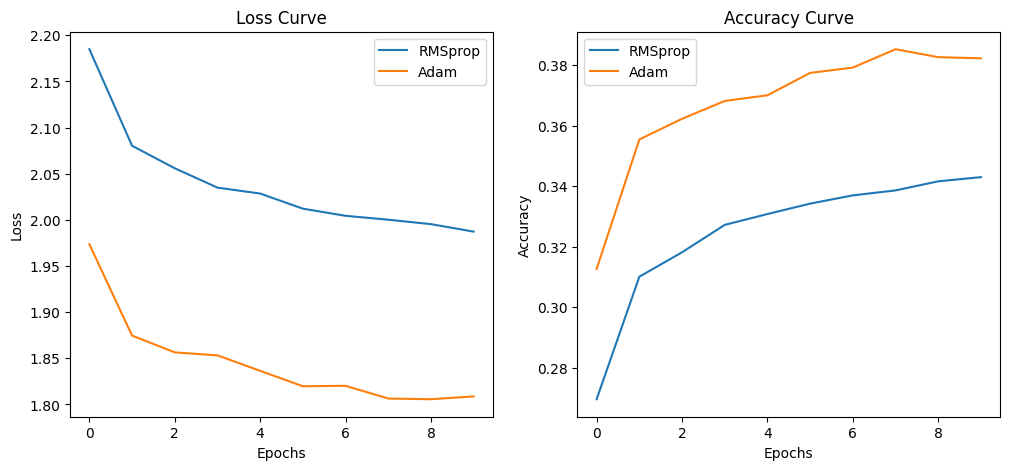

Final Accuracy - RMSprop: 0.3430, Adam: 0.3822


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

def create_model():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(10, activation='softmax')
    ])
    return model


model_rmsprop = create_model()
model_rmsprop.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

model_adam = create_model()
model_adam.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(history_rmsprop.history['loss'], label='RMSprop')
axes[0].plot(history_adam.history['loss'], label='Adam')
axes[0].set_title('Loss Curve')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_rmsprop.history['accuracy'], label='RMSprop')
axes[1].plot(history_adam.history['accuracy'], label='Adam')
axes[1].set_title('Accuracy Curve')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()


final_acc_rmsprop = history_rmsprop.history['accuracy'][-1]
final_acc_adam = history_adam.history['accuracy'][-1]
print(f"Final Accuracy - RMSprop: {final_acc_rmsprop:.4f}, Adam: {final_acc_adam:.4f}")